# Email Spam Classification

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,  confusion_matrix, recall_score, precision_score, f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


## Loading the data

In [65]:
data_path = r"D:\\Machine Learning\\Email_Spam_Classification\\data\\emails.csv"
df = pd.read_csv(data_path)
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [5]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64


In [ ]:
text_col = 'Email No.' if 'Email No.' in df.columns else df.columns[0]
label_col = 'Prediction' if 'Prediction' in df.columns else df.columns[3008]

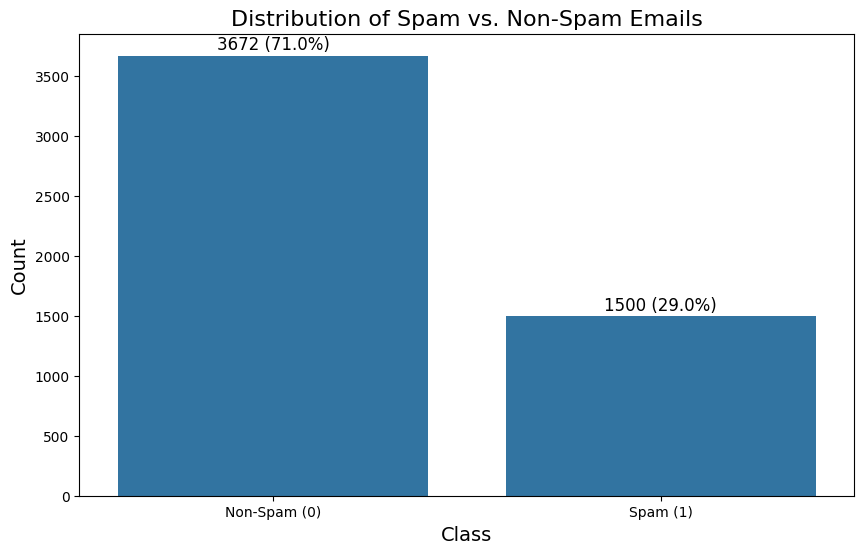

In [9]:
plt.figure(figsize=(10, 6))
class_counts = df[label_col].value_counts()
ax = sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Spam vs. Non-Spam Emails', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
# Add count labels on top of bars
for i, count in enumerate(class_counts.values):
    ax.text(i, count + 50, f"{count} ({count/len(df):.1%})", ha='center', fontsize=12)

plt.xticks([0, 1], ['Non-Spam (0)', 'Spam (1)'])
plt.savefig(r"D:\Machine Learning\Email_Spam_Classification\class_distribution.png")
plt.show()

In [19]:
print(f"Dataset shape: {df.shape}")
print(df.head())
print(df.columns)

Dataset shape: (5172, 3008)
  Email No.  the  to  ect  and  for  of    a  you  hou  ...  allowing  ff  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0   0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0   1   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0   0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0   0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0   1   

   dry  Prediction  text_length  word_count  contains_number  contains_url  \
0    0           0            7           2                1             0   
1    0           0            7           2                1             0   
2    0           0            7           2                1             0   
3    0           0            7           2                1             0   
4    0           0            7           2                1             0   

   contains_currency  contains_exclamati

In [20]:
X = df.drop(columns=['Email No.', 'Prediction'])
y = df['Prediction']

print(X.shape)
print(y.shape)

(5172, 3006)
(5172,)


## Dữ liệu gốc

In [66]:
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Gaussian Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, C=1.0)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    
    
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)


print("\n--- Model Comparison ---")
for name, metrics in sorted(results.items(), key=lambda x: x[1]['f1'], reverse=True):
    print(f"{name}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f}")
    print(f"  F1 Score: {metrics['f1']:.4f}")


results_file_path = r"D:\Machine Learning\Email_Spam_Classification\model_comparison_results.txt"

with open(results_file_path, 'w') as f:
    f.write("=== Email Spam Classification Model Comparison ===\n\n")
    
    
    f.write("--- Model Comparison (Sorted by F1 Score) ---\n")
    for name, metrics in sorted(results.items(), key=lambda x: x[1]['f1'], reverse=True):
        f.write(f"{name}:\n")
        f.write(f"  Accuracy: {metrics['accuracy']:.4f}\n")
        f.write(f"  Precision: {metrics['precision']:.4f}\n")
        f.write(f"  Recall: {metrics['recall']:.4f}\n")
        f.write(f"  F1 Score: {metrics['f1']:.4f}\n\n")
    
    # Write detailed results for each model
    f.write("--- Detailed Model Results ---\n\n")
    for name, model in models.items():
        f.write(f"{name}:\n")
        
        # Get metrics
        metrics = results[name]
        f.write(f"  Accuracy: {metrics['accuracy']:.4f}\n")
        f.write(f"  Precision: {metrics['precision']:.4f}\n")
        f.write(f"  Recall: {metrics['recall']:.4f}\n")
        f.write(f"  F1 Score: {metrics['f1']:.4f}\n\n")
        
        # Get confusion matrix
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        
        f.write("  Confusion Matrix:\n")
        f.write(f"    [[{cm[0][0]}, {cm[0][1]}]\n")
        f.write(f"     [{cm[1][0]}, {cm[1][1]}]]\n\n")
        f.write("    True Negatives (TN): {}\n".format(cm[0][0]))
        f.write("    False Positives (FP): {}\n".format(cm[0][1]))
        f.write("    False Negatives (FN): {}\n".format(cm[1][0]))
        f.write("    True Positives (TP): {}\n\n".format(cm[1][1]))

print(f"\nResults have been written to: {results_file_path}")


Training K-Nearest Neighbors...
K-Nearest Neighbors Metrics:
Accuracy: 0.9063
Precision: 0.7639
Recall: 0.9730
F1 Score: 0.8559

Confusion Matrix:
[[650  89]
 [  8 288]]

Training Gaussian Naive Bayes...
Gaussian Naive Bayes Metrics:
Accuracy: 0.6986
Precision: 0.4675
Recall: 0.3885
F1 Score: 0.4244

Confusion Matrix:
[[608 131]
 [181 115]]

Training Logistic Regression...
Logistic Regression Metrics:
Accuracy: 0.9720
Precision: 0.9320
Recall: 0.9730
F1 Score: 0.9521

Confusion Matrix:
[[718  21]
 [  8 288]]

--- Model Comparison ---
Logistic Regression:
  Accuracy: 0.9720
  Precision: 0.9320
  Recall: 0.9730
  F1 Score: 0.9521
K-Nearest Neighbors:
  Accuracy: 0.9063
  Precision: 0.7639
  Recall: 0.9730
  F1 Score: 0.8559
Gaussian Naive Bayes:
  Accuracy: 0.6986
  Precision: 0.4675
  Recall: 0.3885
  F1 Score: 0.4244

Results have been written to: D:\Machine Learning\Email_Spam_Classification\model_comparison_results.txt


<Figure size 1200x600 with 0 Axes>

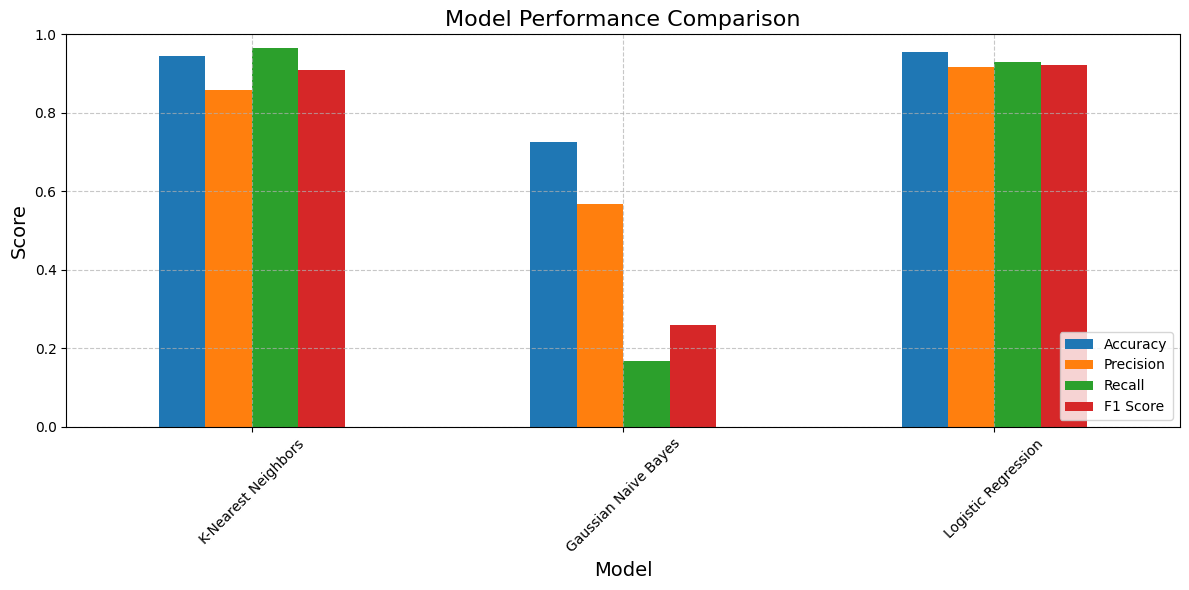

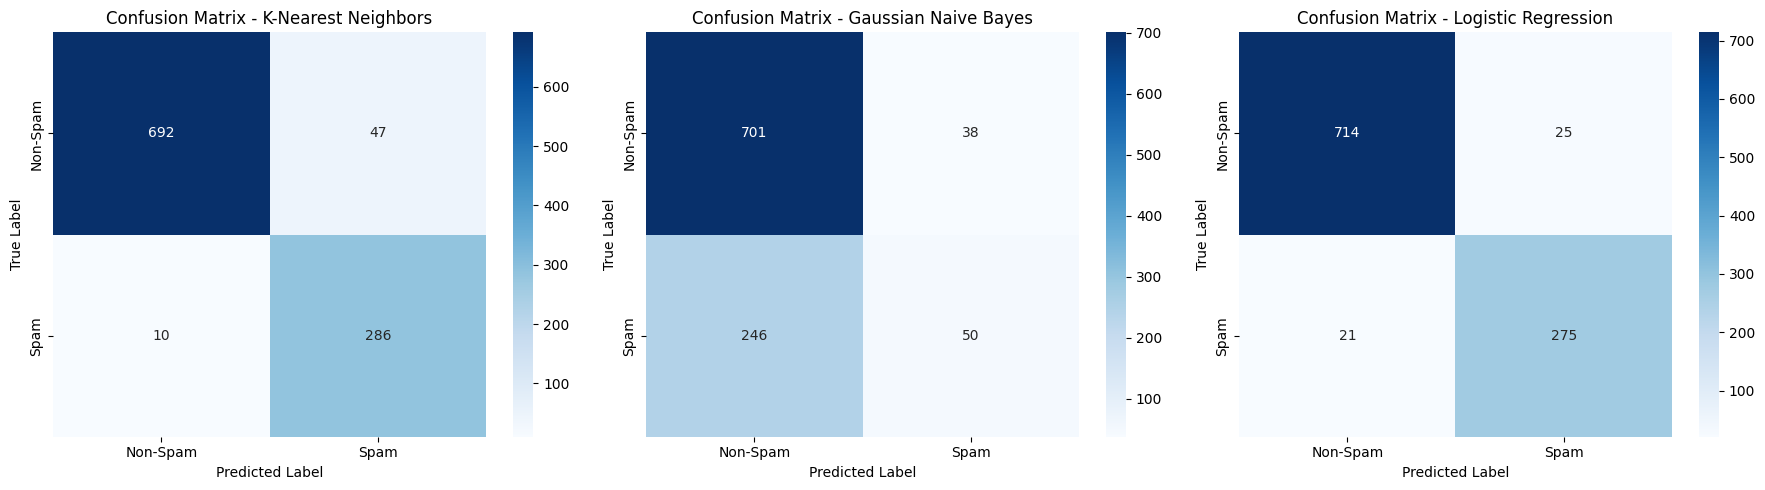

In [46]:
metrics_df = pd.DataFrame({
    model_name: {
        'Accuracy': metrics['accuracy'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1 Score': metrics['f1']
    }
    for model_name, metrics in results.items()
}).T

# Plot all metrics for each model
plt.figure(figsize=(12, 6))
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualize confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
    axes[i].set_xticklabels(['Non-Spam', 'Spam'])
    axes[i].set_yticklabels(['Non-Spam', 'Spam'])

plt.tight_layout()
plt.show()

## Chuẩn hóa dữ liệu

In [21]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

## Giảm chiều dữ liệu

In [53]:
pca = PCA(n_components=774)
X_pca = pca.fit_transform(X_scaled)

In [ ]:

print(f"Number of components: {pca.n_components}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

Number of components: 774
Total explained variance: 0.8983


## Chia dữ liệu 

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [57]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (4137, 774)
Testing set size: (1035, 774)


## Dữ liệu đã chuẩn hóa

In [58]:
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Gaussian Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}


Training K-Nearest Neighbors...
K-Nearest Neighbors Metrics:
Accuracy: 0.9063
Precision: 0.7639
Recall: 0.9730
F1 Score: 0.8559

Confusion Matrix:
[[650  89]
 [  8 288]]

Training Gaussian Naive Bayes...
Gaussian Naive Bayes Metrics:
Accuracy: 0.6986
Precision: 0.4675
Recall: 0.3885
F1 Score: 0.4244

Confusion Matrix:
[[608 131]
 [181 115]]

Training Logistic Regression...
Logistic Regression Metrics:
Accuracy: 0.9720
Precision: 0.9320
Recall: 0.9730
F1 Score: 0.9521

Confusion Matrix:
[[718  21]
 [  8 288]]


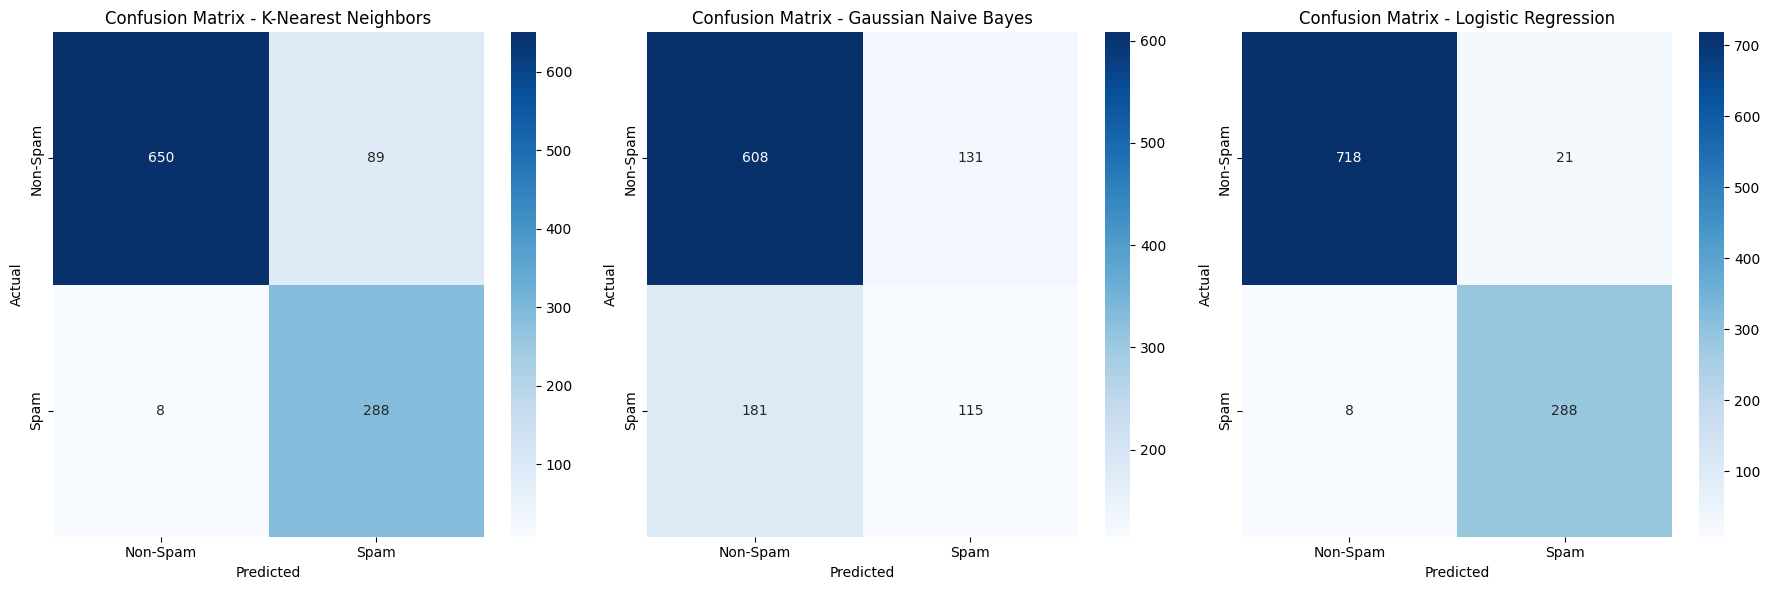

In [63]:
results = {}
confusion_matrices = {}  # Store confusion matrices for later visualization

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate all metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store all metrics in results dictionary
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    
    # Print detailed metrics
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm  # Store for later visualization
    print(cm)

# Create a single figure with 3 subplots for all confusion matrices
plt.figure(figsize=(18, 6))

# Create subplots for each model
for i, (name, cm) in enumerate(confusion_matrices.items()):
    plt.subplot(1, 3, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-Spam', 'Spam'],
                yticklabels=['Non-Spam', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')

plt.tight_layout()
plt.savefig(r"D:\Machine Learning\Email_Spam_Classification\all_confusion_matrices.png")
plt.show()

In [60]:
print("\n--- Model Comparison ---")
for name, metrics in sorted(results.items(), key=lambda x: x[1]['f1'], reverse=True):
    print(f"{name}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f}")
    print(f"  F1 Score: {metrics['f1']:.4f}")

# Visualize all metrics for comparison
metrics_df = pd.DataFrame({
    model_name: {
        'Accuracy': metrics['accuracy'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1 Score': metrics['f1']
    }
    for model_name, metrics in results.items()
}).T


--- Model Comparison ---
Logistic Regression:
  Accuracy: 0.9720
  Precision: 0.9320
  Recall: 0.9730
  F1 Score: 0.9521
K-Nearest Neighbors:
  Accuracy: 0.9063
  Precision: 0.7639
  Recall: 0.9730
  F1 Score: 0.8559
Gaussian Naive Bayes:
  Accuracy: 0.6986
  Precision: 0.4675
  Recall: 0.3885
  F1 Score: 0.4244


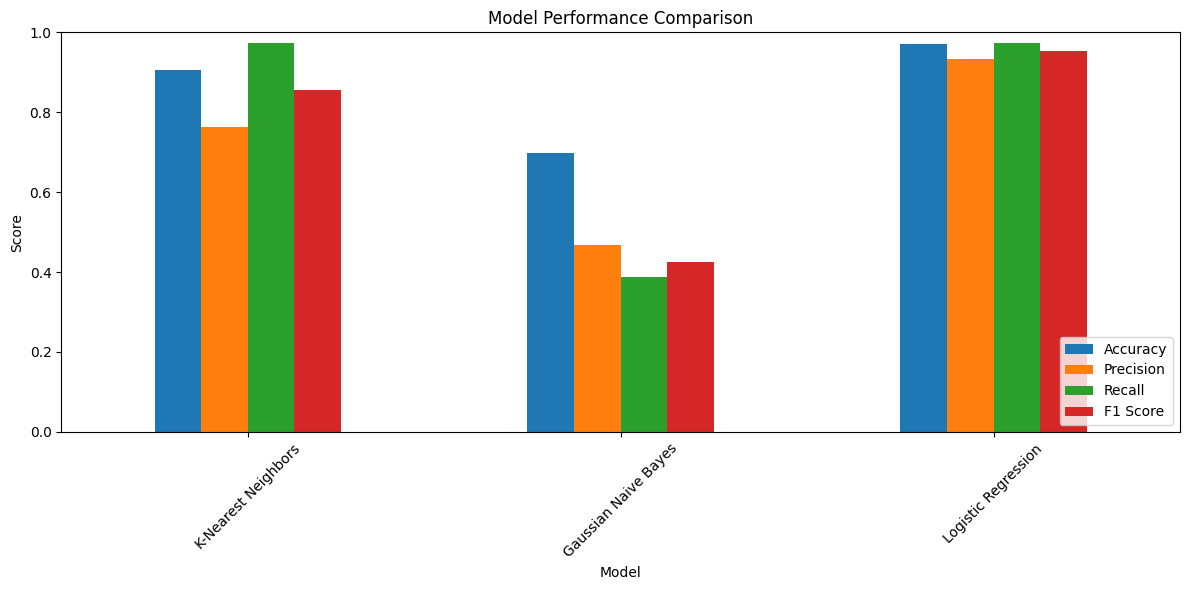

In [61]:
# Plot all metrics for each model
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### 1. Logistic Regression
- Accuracy (Độ chính xác) : 97.20% - Rất cao, cho thấy mô hình phân loại chính xác hầu hết các email
- Precision (Độ chính xác dương tính) : 93.20% - Khi mô hình dự đoán một email là spam, nó đúng trong 93.2% trường hợp
- Recall (Độ nhạy) : 97.30% - Mô hình phát hiện được 97.3% email spam thực sự
- F1 Score : 95.21% - Giá trị cao cho thấy sự cân bằng tốt giữa Precision và Recall
### 2. K-Nearest Neighbors (KNN)
- Accuracy : 90.63% - Khá tốt nhưng thấp hơn Logistic Regression
- Precision : 76.39% - Thấp hơn đáng kể, nhiều email không phải spam bị phân loại nhầm thành spam
- Recall : 97.30% - Bằng với Logistic Regression, phát hiện được hầu hết email spam
- F1 Score : 85.59% - Thấp hơn Logistic Regression do Precision thấp
### 3. Gaussian Naive Bayes
- Accuracy : 69.86% - Thấp nhất trong ba mô hình
- Precision : 46.75% - Rất thấp, gần một nửa các dự đoán spam là sai
- Recall : 38.85% - Thấp nhất, bỏ sót hơn 60% email spam
- F1 Score : 42.44% - Thấp nhất, cho thấy hiệu suất kém
## So sánh với kết quả trước khi chuẩn hóa
So với kết quả trước khi chuẩn hóa dữ liệu (từ báo cáo trước), chúng ta thấy:

1. Logistic Regression : Cải thiện đáng kể ở tất cả các chỉ số (Accuracy từ 95.56% lên 97.20%, F1 Score từ 92.28% lên 95.21%)
2. KNN : Giảm nhẹ về Accuracy (từ 94.49% xuống 90.63%) và Precision (từ 85.89% xuống 76.39%), nhưng Recall tăng nhẹ (từ 96.62% lên 97.30%)
3. Gaussian Naive Bayes : Cải thiện nhẹ về Recall (từ 16.89% lên 38.85%) và F1 Score (từ 26.04% lên 42.44%), nhưng vẫn là mô hình kém hiệu quả nhất
## Kết luận và khuyến nghị
1. Logistic Regression là mô hình hiệu quả nhất:
   
   - Đạt hiệu suất cao nhất ở tất cả các chỉ số
   - Cân bằng tốt giữa việc phát hiện email spam (Recall cao) và hạn chế phân loại nhầm (Precision cao)
   - Việc chuẩn hóa dữ liệu đã cải thiện đáng kể hiệu suất của mô hình này
2. K-Nearest Neighbors là lựa chọn thứ hai:
   
   - Recall cao (97.30%) cho thấy khả năng phát hiện tốt email spam
   - Precision thấp hơn (76.39%) là điểm yếu chính, dẫn đến nhiều cảnh báo sai
   - Phù hợp khi ưu tiên phát hiện càng nhiều email spam càng tốt, chấp nhận một số cảnh báo sai
3. Gaussian Naive Bayes không phù hợp với bài toán này:
   
   - Hiệu suất thấp ở tất cả các chỉ số
   - Mặc dù có cải thiện sau khi chuẩn hóa dữ liệu, nhưng vẫn không đủ tốt để sử dụng trong thực tế
### Khuyến nghị:
1. Triển khai Logistic Regression làm mô hình chính cho hệ thống phân loại email spam
   
   - Chuẩn hóa dữ liệu trước khi đưa vào mô hình
   - Có thể tinh chỉnh thêm tham số C để tối ưu hóa hiệu suất
2. Cân nhắc kết hợp mô hình :
   
   - Có thể sử dụng KNN như một mô hình bổ sung khi cần ưu tiên phát hiện spam (Recall cao)
   - Kết hợp dự đoán từ nhiều mô hình có thể cải thiện độ tin cậy
3. Tiếp tục cải thiện dữ liệu :
   
   - Thử nghiệm với các phương pháp trích xuất đặc trưng khác
   - Áp dụng kỹ thuật lựa chọn đặc trưng để loại bỏ các đặc trưng không liên quan
4. Giám sát và cập nhật mô hình :
   
   - Email spam liên tục thay đổi, cần cập nhật mô hình định kỳ với dữ liệu mới
   - Theo dõi hiệu suất mô hình trong thực tế và điều chỉnh khi cần thiết